<a href="https://colab.research.google.com/github/keshavvprabhu/machine_learning/blob/main/RL_UpperConfidenceBound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning

---

## Multi armed Bandit Problem

What is the Multi Armed Bandit Problem
A one armed bandit is a slot machine. Back in the day the slot machines had a handle on the side and these machines would actually cause you to lose your money and there was a 50% chance that you could lose money and they put a bug into them so that people would be losing money.

The kind of challenge when a person comes across multiple of these buggy slot machines. How do you play them to get maximize the returns. How do you play and which machine do you play with to get maximum returns.

Each machine has its own distribution which tells you on whether you win or lose based on these distributions. Your goal is to figure out which of these distribution.





# Upper Confidence Bound Algorithm

## Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the Dataset

In [44]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

## Get the first 5 records

In [45]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Get the last 5 records

In [46]:
df.tail()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0
9999,0,1,0,0,0,0,0,0,0,0


## Find out the size and shape of the dataset

In [47]:
df.shape

(10000, 10)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


## Describe the Dataset

In [49]:
df.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Implement the UCB algorithm

In [50]:
import math
number_of_users = 10000
number_of_ads = 10
ads_selected = list()
numbers_of_selections = [0] * number_of_ads
sum_of_rewards = [0] * number_of_ads
total_reward = 0

for round in range(0, number_of_users):
    # print(round)
    ad = 0
    max_upper_bound = 0
    for i in range(0, number_of_ads):
        if numbers_of_selections[i] > 0:
            average_reward = sum_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(1.5 * math.log(round + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
            # print(upper_bound, average_reward, delta_i)
        else:
            upper_bound = 1e400
        
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    ads_selected.append(ad)
    # print(ads_selected)

    numbers_of_selections[ad] += 1
    reward = df.values[round, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward

## Visualizing the Results

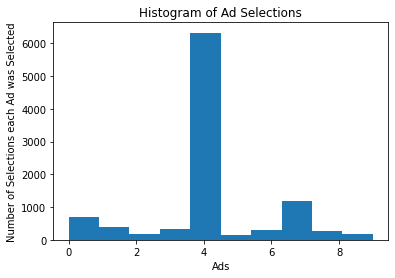

In [51]:
plt.hist(ads_selected)
plt.title('Histogram of Ad Selections')
plt.xlabel('Ads')
plt.ylabel('Number of Selections each Ad was Selected')
plt.show()